### ## *SENTIMENT ANALYSIS OF BANK OF SCOTLAND UK MOBILE APPLICATION REVIEWS -GOOGLE PLAY*

#### *Basic Libraries*

In [1]:
#Importing all Needed Libraries
import pandas as pd # data processing
import numpy as np # working with arrays
import re # for checking strings
import string # handles string
import random # generates floats

import matplotlib.pyplot as plt # for Visualization
import seaborn as sns # for Visualization
from wordcloud import WordCloud, STOPWORDS # for Visualization
import nltk # Package for Natural language  Processing
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import TweetTokenizer
from autocorrect import Speller

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #Vectorizer
from sklearn.preprocessing import StandardScaler # data normalisation
from sklearn.model_selection import train_test_split #data split
from sklearn.ensemble import GradientBoostingClassifier #decision tree algorithm
from sklearn.linear_model import LogisticRegression #KNN algorithm
from sklearn.svm import SVC #SVM algorithm
from sklearn.ensemble import RandomForestClassifier #random Forest tree algorithm
from xgboost import XGBClassifier #XGBoost algorithm

from sklearn import metrics
from sklearn.metrics import confusion_matrix #evaluation metric
from sklearn.metrics import accuracy_score #evaluation metric
from sklearn.metrics import f1_score #evaluation metric
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Importing the Dataset
df= pd.read_csv('C:/Users/emera/Desktop/Datasets/Google Play/SentimentLabelledBofSGooglePlay.csv',encoding='latin-1')
df

,Unnamed: 0,Unnamed: 0.1,reviewId,userName,userImage,review,score,createdat,Positive,Negative,Neutral,Compound,Sentiment
0,0,0,gp:AOqpTOEfoM_PAk2huYxqXVNpnyJQ6DHBmNZSyVwMlOY...,Johnarchie Coull,https://play-lh.googleusercontent.com/a/AATXAJ...,helpful,5,2022-02-16 14:14:17,1.000,0.0,0.000,0.4215,Positive
1,1,1,gp:AOqpTOGn_vIXY0HkE-K3sOYUTYz9aE5dmmUg581MGuG...,Chinwe Ochin,https://play-lh.googleusercontent.com/a/AATXAJ...,enjoying app make transaction easy,5,2022-02-16 06:54:37,0.677,0.0,0.323,0.7430,Positive
2,2,2,gp:AOqpTOFz-Th04wyvdJbMcBJR-IarDd4BuC6BfdY3f6-...,Smart-speakers Organization,https://play-lh.googleusercontent.com/a-/AOh14...,satisfactory,5,2022-02-16 01:12:50,1.000,0.0,0.000,0.3612,Positive
3,3,3,gp:AOqpTOEOZMcCGehTd7VfnxDUV2k8D_bmq0zeFcgcVKZ...,Gordon McEwen,https://play-lh.googleusercontent.com/a/AATXAJ...,excellent,5,2022-02-15 20:21:37,1.000,0.0,0.000,0.5719,Positive
4,4,4,gp:AOqpTOEycRKohd2qY6tGeWmTdmaSuP6wmzpP1y_5SmB...,Craig M,https://play-lh.googleusercontent.com/a/AATXAJ...,important app use,5,2022-02-15 19:32:00,0.474,0.0,0.526,0.2023,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3495,gp:AOqpTOFGg5gR462Ass-uGYYmqVQg2gXjV0xSjqjoAGz...,Anne MacDonald,https://play-lh.googleusercontent.com/a/AATXAJ...,easy ork feel secure using app anne macdonald,5,2020-08-20 09:12:08,0.469,0.0,0.531,0.6486,Positive
3496,3496,3496,gp:AOqpTOHBPnXtUTbaOsAtbeMuI-NRXKp2Bq58gPZgMX4...,Elizabeth Davidson,https://play-lh.googleusercontent.com/a/AATXAJ...,easy access,5,2020-08-19 22:00:50,0.744,0.0,0.256,0.4404,Positive
3497,3497,3497,gp:AOqpTOFZGmgxeTEXCu9TDFRW_QMzQI8DjgfZzsQoW20...,Henry Leung,https://play-lh.googleusercontent.com/a/AATXAJ...,user friendly,5,2020-08-19 16:32:41,0.762,0.0,0.238,0.4939,Positive
3498,3498,3498,gp:AOqpTOHIupooXXYWpRoR2d4cyw3-wlgB3K3e_fwhMnG...,Elena Uslu,https://play-lh.googleusercontent.com/a/AATXAJ...,awsome,5,2020-08-19 13:50:37,0.000,0.0,1.000,0.0000,Neutral


### *Exploratory Data Analysis*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3500 non-null   int64  
 1   Unnamed: 0.1  3500 non-null   int64  
 2   reviewId      3500 non-null   object 
 3   userName      3500 non-null   object 
 4   userImage     3500 non-null   object 
 5   review        3491 non-null   object 
 6   score         3500 non-null   int64  
 7   createdat     3500 non-null   object 
 8   Positive      3500 non-null   float64
 9   Negative      3500 non-null   float64
 10  Neutral       3500 non-null   float64
 11  Compound      3500 non-null   float64
 12  Sentiment     3500 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 355.6+ KB


In [5]:
#Dropping all null values
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3491 entries, 0 to 3499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3491 non-null   int64  
 1   Unnamed: 0.1  3491 non-null   int64  
 2   reviewId      3491 non-null   object 
 3   userName      3491 non-null   object 
 4   userImage     3491 non-null   object 
 5   review        3491 non-null   object 
 6   score         3491 non-null   int64  
 7   createdat     3491 non-null   object 
 8   Positive      3491 non-null   float64
 9   Negative      3491 non-null   float64
 10  Neutral       3491 non-null   float64
 11  Compound      3491 non-null   float64
 12  Sentiment     3491 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 381.8+ KB


In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,score,Positive,Negative,Neutral,Compound
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1749.445431,1749.445431,4.471212,0.552690,0.039061,0.408251,0.425336
std,1011.431773,1011.431773,1.181260,0.330956,0.121787,0.306146,0.335865
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.971900
25%,873.500000,873.500000,5.000000,0.306000,0.000000,0.208000,0.340000
50%,1751.000000,1751.000000,5.000000,0.592000,0.000000,0.357000,0.440400
75%,2625.500000,2625.500000,5.000000,0.787000,0.000000,0.592000,0.648600
max,3499.000000,3499.000000,5.000000,1.000000,1.000000,1.000000,0.988000


In [8]:
df.shape

(3491, 13)

In [9]:
#Viewing the columns contained in the dataset
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'reviewId', 'userName', 'userImage',
       'review', 'score', 'createdat', 'Positive', 'Negative', 'Neutral',
       'Compound', 'Sentiment'],
      dtype='object')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

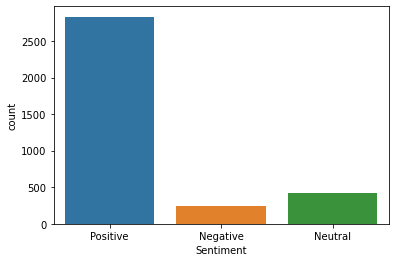

In [10]:
sns.countplot(x='Sentiment',data=df)

<AxesSubplot:xlabel='score', ylabel='count'>

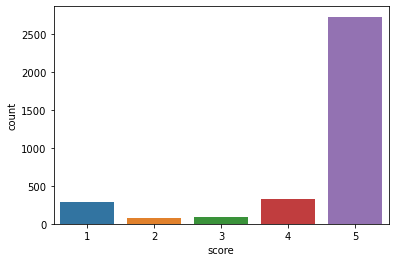

In [14]:
sns.countplot(x='score',data=df)

In [15]:
#Checking to see if there are any more null Values
print("Percentage null or na values in df")
print(((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2))

Percentage null or na values in df
Unnamed: 0      0.0
Unnamed: 0.1    0.0
reviewId        0.0
userName        0.0
userImage       0.0
review          0.0
score           0.0
createdat       0.0
Positive        0.0
Negative        0.0
Neutral         0.0
Compound        0.0
Sentiment       0.0
dtype: float64


### *Text Prepocessing*


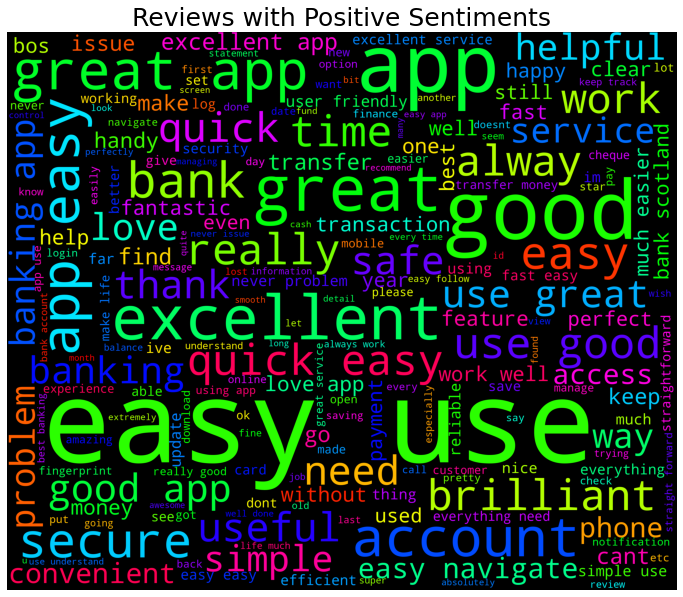

In [16]:
new_df = df[df['Sentiment']=='Positive']
words = ' '.join(new_df['review'])
positive_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word != 'RT'
                            ])
pos_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='Black',
                      colormap='hsv',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.title('Reviews with Positive Sentiments',fontsize=25)
plt.show()


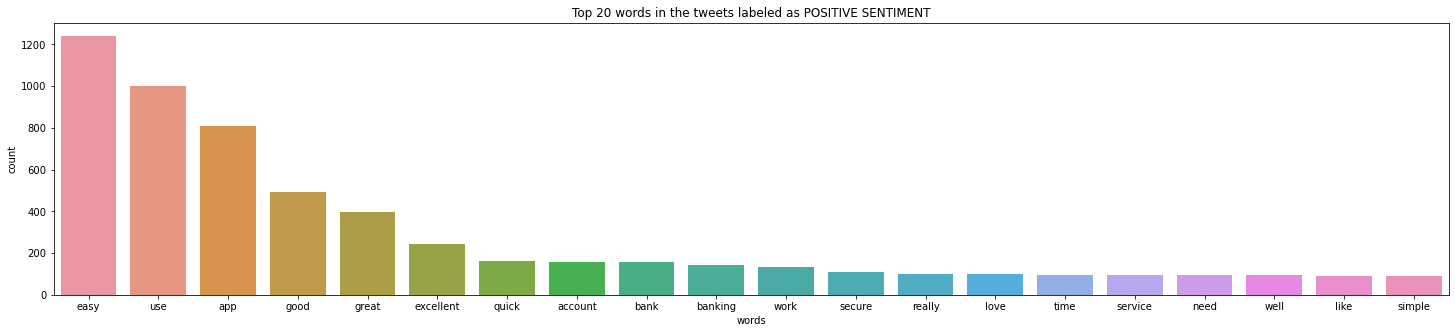

In [17]:
list_pos_words = [ x for x in positive_words.split()]
freq_dis_pos = nltk.FreqDist(list_pos_words)
freq_dataframe = pd.DataFrame({'words': list(freq_dis_pos.keys()), 'count': list(freq_dis_pos.values())})
freq_dataframe = freq_dataframe.nlargest(columns="count", n = 20)
plt.figure(figsize=(25,5))
ax = sns.barplot(data=freq_dataframe, x= "words", y = "count")
ax.set(ylabel = 'count')
plt.title("Top 20 words in the tweets labeled as POSITIVE SENTIMENT")
plt.show()


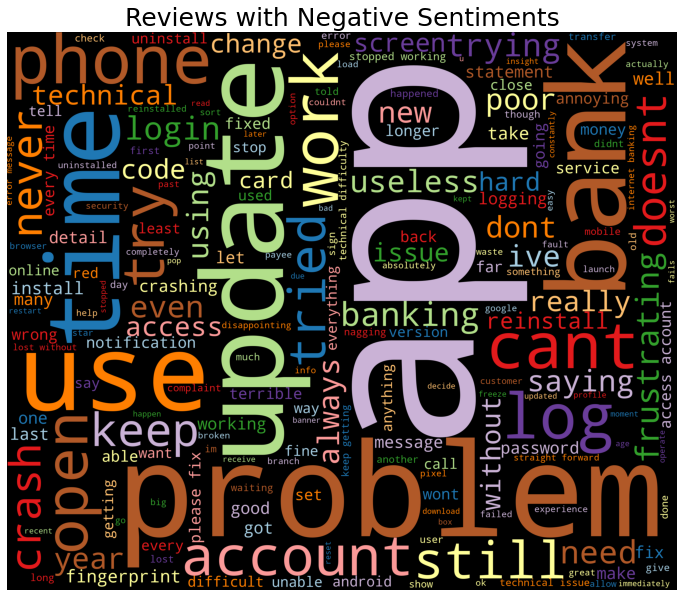

In [18]:
new_df = df[df['Sentiment']=='Negative']
words = ' '.join(new_df['review'])
negative_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word != 'RT'
                            ])
neg_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='Paired',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.title('Reviews with Negative Sentiments',fontsize=25)
plt.show()

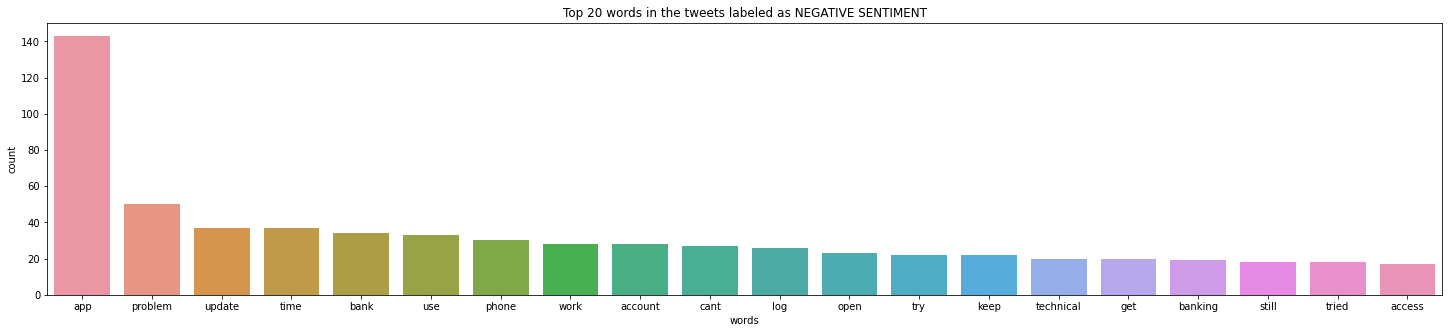

In [19]:
list_neg_words = [ x for x in negative_words.split()]
freq_dis_neg = nltk.FreqDist(list_neg_words)
freq_dataframe = pd.DataFrame({'words': list(freq_dis_neg.keys()), 'count': list(freq_dis_neg.values())})
freq_dataframe = freq_dataframe.nlargest(columns="count", n = 20)
plt.figure(figsize=(25,5))
ax = sns.barplot(data=freq_dataframe, x= "words", y = "count")
ax.set(ylabel = 'count')
plt.title("Top 20 words in the tweets labeled as NEGATIVE SENTIMENT")
plt.show()

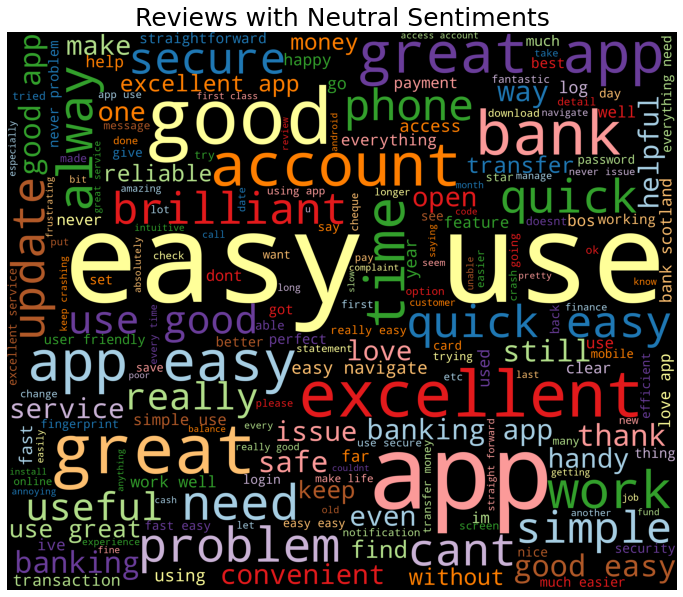

In [20]:
new_df2=df[df['Sentiment']=='Neutral']
words = ' '.join(df['review'])
neutral_words = " ".join([str(word) for word in words.split()
                            if 'http' not in word
                                and word != 'RT'
                            ])
neu_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='Paired',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(neu_wordcloud)
plt.axis('off')
plt.title('Reviews with Neutral Sentiments',fontsize=25)
plt.show()

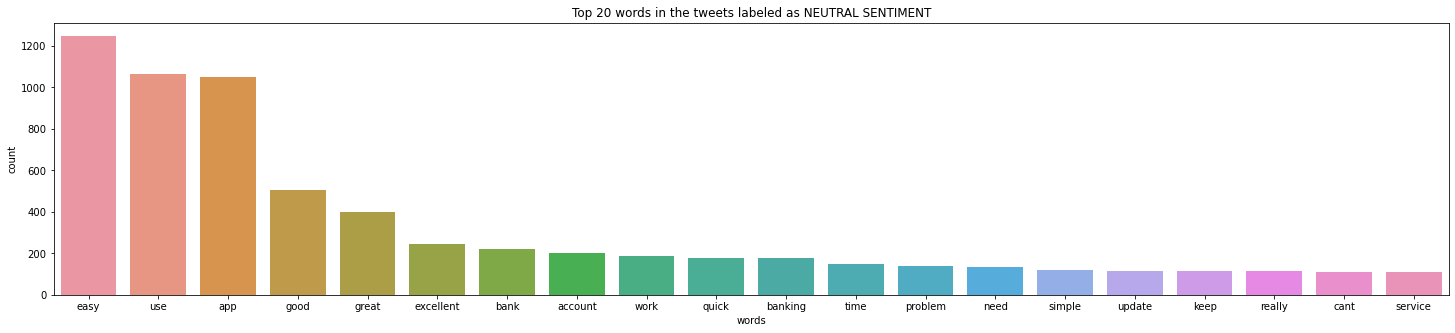

In [21]:
list_neu_words = [ x for x in neutral_words.split()]
freq_dis_neu = nltk.FreqDist(list_neu_words)
freq_dataframe = pd.DataFrame({'words': list(freq_dis_neu.keys()), 'count': list(freq_dis_neu.values())})
freq_dataframe = freq_dataframe.nlargest(columns="count", n = 20)
plt.figure(figsize=(25,5))
ax = sns.barplot(data=freq_dataframe, x= "words", y = "count")
ax.set(ylabel = 'count')
plt.title("Top 20 words in the tweets labeled as NEUTRAL SENTIMENT")
plt.show()

In [22]:
data = df[["review","Sentiment"]]

In [23]:

features = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

In [24]:
labels, features

(array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Neutral',
        'Positive'], dtype=object),
 array(['helpful', 'enjoying app make transaction easy', 'satisfactory',
        ..., 'user friendly', 'awsome', 'excellent service'], dtype=object))

In [25]:
features_pp = []
for i in range(0, len(features)):
    feature_pp = re.sub(r'\W', ' ', str(features[i]))
    feature_pp = re.sub(r'\s+[a-zA-Z]\s+', ' ', feature_pp)
    feature_pp = re.sub(r'\^[a-zA-Z]\s+', ' ', feature_pp)
    feature_pp = re.sub(r'\s+', ' ', feature_pp, flags=re.I)
    feature_pp = re.sub(r'^b\s+', '', feature_pp)
    feature_pp = feature_pp.lower()
    features_pp.append(feature_pp)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(max_features=2500, 
    min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
features_pp = vectorizer.fit_transform(features_pp).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_pp, labels, test_size=0.3, random_state=0)

In [28]:
print(X_train.shape,X_test.shape)

(2443, 392) (1048, 392)


#### *Logistic Regression*

In [29]:
LogReg= LogisticRegression()
LogReg= LogReg.fit(X_train,y_train)
y_pred= LogReg.predict(X_test)

In [30]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

print("\nClassification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[ 24  11  45]
 [  2  59  56]
 [  4   6 841]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.80      0.30      0.44        80
     Neutral       0.78      0.50      0.61       117
    Positive       0.89      0.99      0.94       851

    accuracy                           0.88      1048
   macro avg       0.82      0.60      0.66      1048
weighted avg       0.87      0.88      0.86      1048



In [31]:
#Performing 10-fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, features_pp, labels, cv=kfold, scoring=scoring)
LGA= results.mean()
LGA

0.882552599263201

In [32]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [33]:
LGRA= multiclass_roc_auc_score(y_test,y_pred)
LGRA

0.709228997494475

#### *RandomForest*

In [34]:
rf=RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)

In [35]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

print("\nClassification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[ 30  18  32]
 [  2  83  32]
 [  6  26 819]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.79      0.38      0.51        80
     Neutral       0.65      0.71      0.68       117
    Positive       0.93      0.96      0.94       851

    accuracy                           0.89      1048
   macro avg       0.79      0.68      0.71      1048
weighted avg       0.89      0.89      0.88      1048



In [36]:
#Performing 10-fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
modelCV = RandomForestClassifier(n_estimators=100)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, features_pp, labels, cv=kfold, scoring=scoring)
RDF= results.mean()
RDF

0.8922906262791651

In [37]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [38]:
RF= multiclass_roc_auc_score(y_test,y_pred)
RF

0.7777333867110917

#### *Gradient Boosting*

In [39]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
y_pred = gb_clf.predict(X_test)


In [40]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

print("\nClassification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[ 32   5  43]
 [  4  41  72]
 [  7   6 838]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.74      0.40      0.52        80
     Neutral       0.79      0.35      0.49       117
    Positive       0.88      0.98      0.93       851

    accuracy                           0.87      1048
   macro avg       0.80      0.58      0.64      1048
weighted avg       0.86      0.87      0.85      1048



In [41]:
#Performing 10-fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
modelCV = GradientBoostingClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, features_pp, labels, cv=kfold, scoring=scoring)
GDBA= results.mean()
GDBA

0.8659443307408923

In [42]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [43]:
GBA= multiclass_roc_auc_score(y_test,y_pred)
GBA

0.6880359951263942

#### *Support Vector Machine*

In [44]:
svc_clf=SVC(probability=True)
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)

In [45]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

print("\nClassification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[ 21   9  50]
 [  1  69  47]
 [  2  19 830]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.88      0.26      0.40        80
     Neutral       0.71      0.59      0.64       117
    Positive       0.90      0.98      0.93       851

    accuracy                           0.88      1048
   macro avg       0.83      0.61      0.66      1048
weighted avg       0.87      0.88      0.86      1048



In [46]:
#Performing 10-fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
modelCV = svc_clf
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, features_pp, labels, cv=kfold, scoring=scoring)
SVM=results.mean()
SVM

0.8868481375358167

In [47]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [48]:
SVCA= multiclass_roc_auc_score(y_test,y_pred)
SVCA


0.7170010984423514

#### *XGBoost*

In [49]:

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

print("\nClassification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[ 36  18  26]
 [  5  91  21]
 [ 12  26 813]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.68      0.45      0.54        80
     Neutral       0.67      0.78      0.72       117
    Positive       0.95      0.96      0.95       851

    accuracy                           0.90      1048
   macro avg       0.77      0.73      0.74      1048
weighted avg       0.89      0.90      0.89      1048



In [51]:
#Performing 10-fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
modelCV = xgb_clf
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, features_pp, labels, cv=kfold, scoring=scoring)
XB= results.mean()
XB

C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\emera\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9097666803110929

In [52]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [53]:
XGBA= multiclass_roc_auc_score(y_test,y_pred)
XGBA

0.8132871259059096

#### *Comparison of ML Models*

In [54]:
Algorithms= ['LogisticRegression','RandomForest','GB','SVM','XGBoost']
AUC_ROC= [LGRA,RF,GBA,SVCA, XGBA]
CV_Accuracy = [LGA, RDF, GDBA, SVM, XB]
comp= pd.DataFrame([AUC_ROC,CV_Accuracy]).T
comp.set_index([Algorithms],inplace=True)
comp.columns=['AUC-ROC', 'CV_Accuracy']
comp

,AUC-ROC,CV_Accuracy
LogisticRegression,0.709229,0.882553
RandomForest,0.777733,0.892291
GB,0.688036,0.865944
SVM,0.717001,0.886848
XGBoost,0.813287,0.909767


<AxesSubplot:title={'center':'Model Comparison'}>

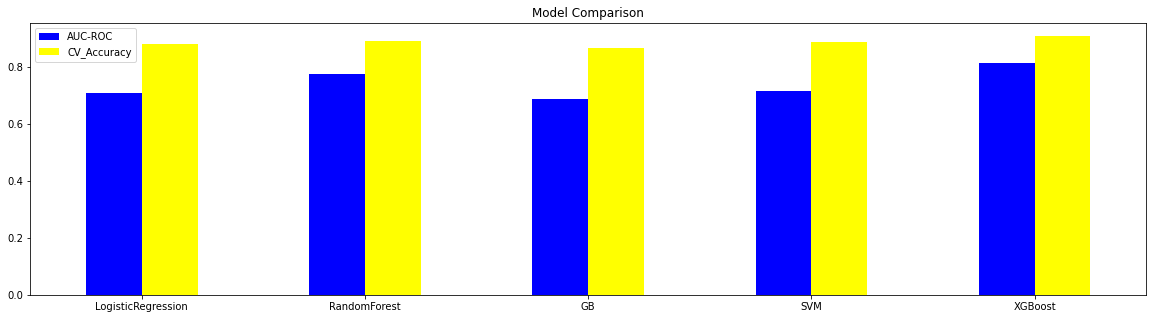

In [55]:

comp.plot(kind='bar',figsize=(20,5),rot=0,title='Model Comparison',color=['Blue','Yellow'])

In [56]:
pos_wordcloud.to_file("wordcloud1BofSGooglePlay.png")
neg_wordcloud.to_file("wordcloud2BofSGooglePla.png")
neu_wordcloud.to_file("wordcloud3BofSGooglePla.png")